In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [7]:
df = pd.read_csv('df_for_model.csv')
print(df.head())

   Year     T_degC     Salnty       O2Sat  Oxy_umol/Kg     PO4uM    SiO3uM  \
0  1959  17.863894  33.669580   98.838904   234.127940  0.353824  1.666667   
1  1961  16.649860  33.485743   99.035517   240.502596  0.462041  2.437500   
2  1962  16.226779  33.640093   98.763186   241.461856  0.458537  3.152174   
3  1963  19.458958  33.878460  105.130020   241.246157  0.533880  3.920548   
4  1964  15.373122  33.562444  103.366458   255.314702  0.438119  2.900926   

         CPI  Atlantic_menhaden  Gulf_menhaden  Pacific_cod  Atlantic_herring  \
0  22.500000           273738.5         451676         6045             55056   
1  22.991667           258943.5         532044         1391             26419   
2  23.975000           279246.5         506527         1445             71912   
3  23.933333           164860.5         493919         2889             70203   
4  23.366667           127737.5         456656         2909             28887   

   Atlantic_cod  
0         21084  
1       

In [59]:
df = df.set_index('Year')
df

,T_degC,Salnty,O2Sat,Oxy_umol/Kg,PO4uM,SiO3uM,CPI,Atlantic_menhaden,Gulf_menhaden,Pacific_cod,Atlantic_herring,Atlantic_cod
Year,,,,,,,,,,,,
1959,17.863894,33.669580,98.838904,234.127940,0.353824,1.666667,22.500000,273738.5,451676,6045,55056,21084
1961,16.649860,33.485743,99.035517,240.502596,0.462041,2.437500,22.991667,258943.5,532044,1391,26419,21133
1962,16.226779,33.640093,98.763186,241.461856,0.458537,3.152174,23.975000,279246.5,506527,1445,71912,21278
1963,19.458958,33.878460,105.130020,241.246157,0.533880,3.920548,23.933333,164860.5,493919,2889,70203,19132
1964,15.373122,33.562444,103.366458,255.314702,0.438119,2.900926,23.366667,127737.5,456656,2909,28887,17576
1965,16.163011,33.578053,103.928220,254.272546,0.412083,2.625000,24.058333,137935.5,507077,4606,34360,16351
1968,15.268290,33.492504,107.116521,266.882645,0.372807,2.890374,26.941667,100141.0,423459,2892,41838,22324
1969,16.555962,33.526527,105.148660,255.190341,0.367948,2.316281,28.400000,75084.0,550880,1975,31371,26083
1971,12.290000,32.878000,105.050000,279.102000,0.445000,3.500000,34.491667,133100.0,729900,2800,35100,24600


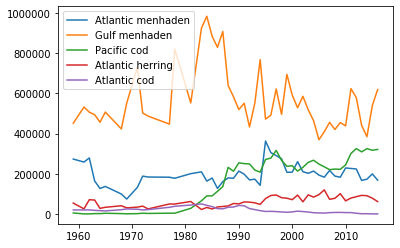

In [60]:
plt.plot(df.index, df['Atlantic_menhaden'], label='Atlantic menhaden')
plt.plot(df.index, df['Gulf_menhaden'], label='Gulf menhaden')
plt.plot(df.index, df['Pacific_cod'], label='Pacific cod')
plt.plot(df.index, df['Atlantic_herring'], label='Atlantic herring')
plt.plot(df.index, df['Atlantic_cod'], label='Atlantic cod')
plt.legend(loc='best')
plt.show()

In [93]:
"""df['Atlantic_cod'].plot(figsize=(12,6))
plt.xlabel('Year')
plt.ylabel('Fish Population')
plt.title('Atlantic Cod Fish Population Time Series')
plt.show()"""

"df['Atlantic_cod'].plot(figsize=(12,6))\nplt.xlabel('Year')\nplt.ylabel('Fish Population')\nplt.title('Atlantic Cod Fish Population Time Series')\nplt.show()"

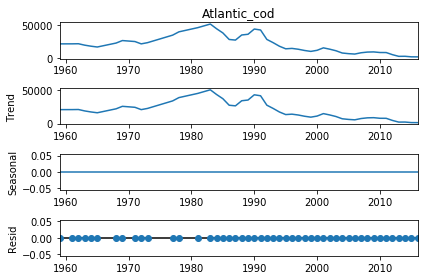

In [52]:
result = seasonal_decompose(df['Atlantic_cod'], model='additive', period=1)
result.plot()
plt.show()

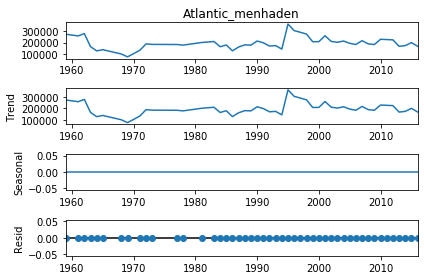

In [64]:
result = seasonal_decompose(df['Atlantic_menhaden'], model='additive', period=1)
result.plot()
plt.show()

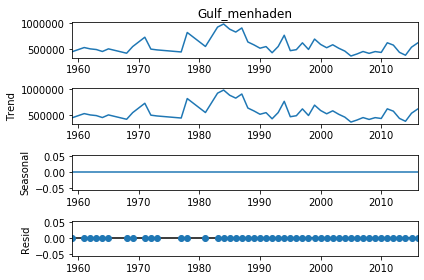

In [65]:
result = seasonal_decompose(df['Gulf_menhaden'], model='additive', period=1)
result.plot()
plt.show()

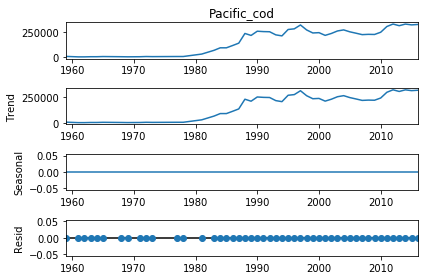

In [66]:
result = seasonal_decompose(df['Pacific_cod'], model='additive', period=1)
result.plot()
plt.show()

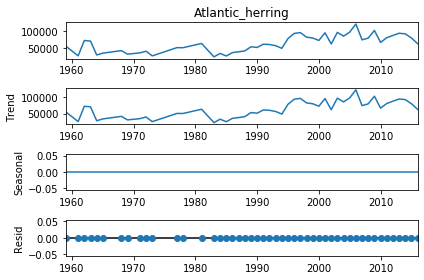

In [67]:
result = seasonal_decompose(df['Atlantic_herring'], model='additive', period=1)
result.plot()
plt.show()

In [53]:
result = adfuller(df['Atlantic_cod'])
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
print(f'Critical Values: {result[4]}')

ADF Statistic: -0.9880615417312613
p-value: 0.7575936369443291
Critical Values: {'1%': -3.6055648906249997, '5%': -2.937069375, '10%': -2.606985625}


In [68]:
result = adfuller(df['Atlantic_menhaden'])
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
print(f'Critical Values: {result[4]}')

ADF Statistic: -3.562082873680785
p-value: 0.0065286956598712
Critical Values: {'1%': -3.5778480370438146, '5%': -2.925338105429433, '10%': -2.6007735310095064}


In [69]:
result = adfuller(df['Gulf_menhaden'])
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
print(f'Critical Values: {result[4]}')

ADF Statistic: -3.6179925838872506
p-value: 0.00542621961309536
Critical Values: {'1%': -3.5778480370438146, '5%': -2.925338105429433, '10%': -2.6007735310095064}


In [70]:
result = adfuller(df['Pacific_cod'])
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
print(f'Critical Values: {result[4]}')

ADF Statistic: -0.7979565800882168
p-value: 0.8197215699575127
Critical Values: {'1%': -3.5778480370438146, '5%': -2.925338105429433, '10%': -2.6007735310095064}


In [71]:
result = adfuller(df['Atlantic_herring'])
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
print(f'Critical Values: {result[4]}')

ADF Statistic: -2.0333800785391793
p-value: 0.2721315418120845
Critical Values: {'1%': -3.5812576580093696, '5%': -2.9267849124681518, '10%': -2.6015409829867675}


/opt/anaconda3/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


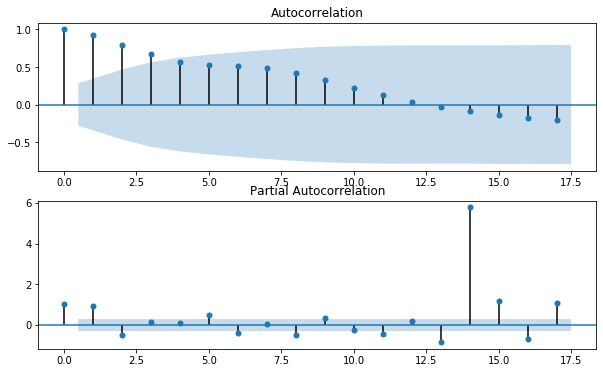

In [54]:
fig, ax = plt.subplots(2,1, figsize=(10,6))
plot_acf(df['Atlantic_cod'], ax=ax[0])
plot_pacf(df['Atlantic_cod'], ax=ax[1])
plt.show()

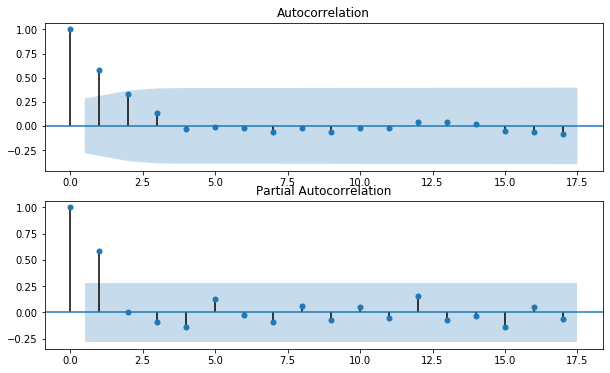

In [73]:
fig, ax = plt.subplots(2,1, figsize=(10,6))
plot_acf(df['Atlantic_menhaden'], ax=ax[0])
plot_pacf(df['Atlantic_menhaden'], ax=ax[1])
plt.show()

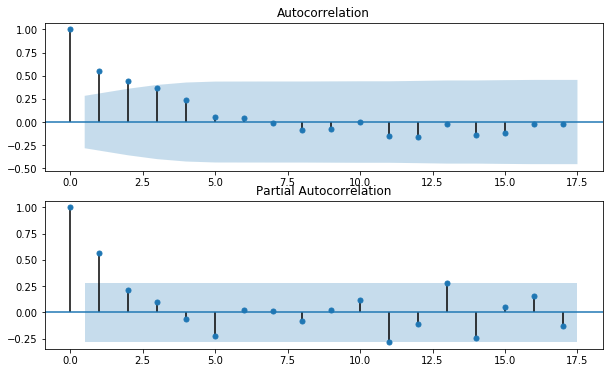

In [74]:
fig, ax = plt.subplots(2,1, figsize=(10,6))
plot_acf(df['Gulf_menhaden'], ax=ax[0])
plot_pacf(df['Gulf_menhaden'], ax=ax[1])
plt.show()

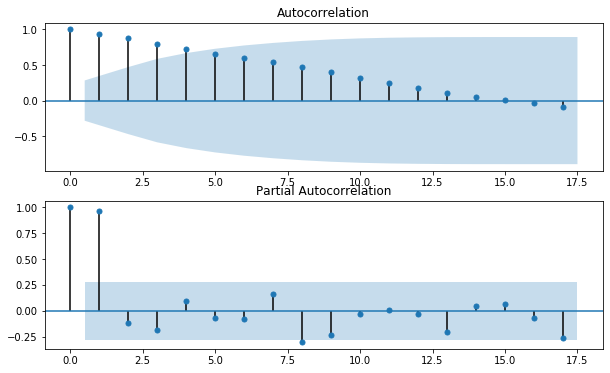

In [75]:
fig, ax = plt.subplots(2,1, figsize=(10,6))
plot_acf(df['Pacific_cod'], ax=ax[0])
plot_pacf(df['Pacific_cod'], ax=ax[1])
plt.show()

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


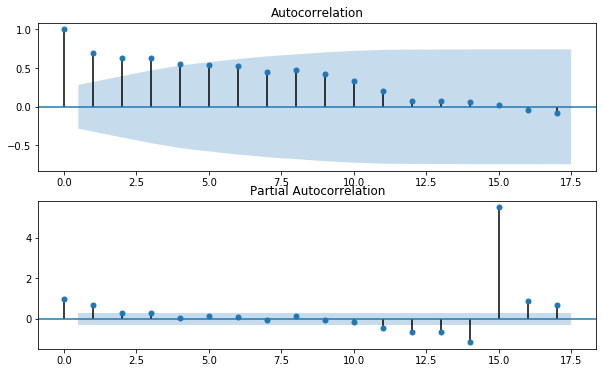

In [76]:
fig, ax = plt.subplots(2,1, figsize=(10,6))
plot_acf(df['Atlantic_herring'], ax=ax[0])
plot_pacf(df['Atlantic_herring'], ax=ax[1])
plt.show()

In [83]:
model = ARIMA(df['Atlantic_cod'], order=(1,1,1))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:           Atlantic_cod   No. Observations:                   48
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -458.552
Date:                Thu, 20 Apr 2023   AIC                            923.104
Time:                        14:00:15   BIC                            928.655
Sample:                             0   HQIC                           925.193
                                 - 48                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3011      0.306     -0.985      0.325      -0.900       0.298
ma.L1          0.6789      0.231      2.933      0.003       0.225       1.133
sigma2      1.799e+07   8.78e-09   2.05e+15      0.0

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [84]:
forecast = model_fit.forecast(steps=5)
print(forecast)

48    1644.425956
49    1589.197680
50    1605.826529
51    1600.819698
52    1602.327220
dtype: float64


/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


In [85]:
model = ARIMA(df['Atlantic_menhaden'], order=(1,1,1))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:      Atlantic_menhaden   No. Observations:                   48
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -568.299
Date:                Thu, 20 Apr 2023   AIC                           1142.598
Time:                        14:00:19   BIC                           1148.148
Sample:                             0   HQIC                          1144.687
                                 - 48                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5650      0.155      3.637      0.000       0.261       0.870
ma.L1         -0.9166      0.120     -7.666      0.000      -1.151      -0.682
sigma2       1.94e+09   1.04e-10   1.87e+19      0.0

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [86]:
forecast = model_fit.forecast(steps=5)
print(forecast)

48    181138.987726
49    188116.728636
50    192059.470283
51    194287.299017
52    195546.123792
dtype: float64


/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


In [87]:
model = ARIMA(df['Gulf_menhaden'], order=(1,1,1))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:          Gulf_menhaden   No. Observations:                   48
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -620.993
Date:                Thu, 20 Apr 2023   AIC                           1247.986
Time:                        14:00:28   BIC                           1253.537
Sample:                             0   HQIC                          1250.075
                                 - 48                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2192      0.325      0.675      0.500      -0.417       0.856
ma.L1         -0.5730      0.330     -1.737      0.082      -1.220       0.074
sigma2      1.781e+10   1.03e-11   1.73e+21      0.0

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [88]:
forecast = model_fit.forecast(steps=5)
print(forecast)

48    572832.859552
49    562746.638523
50    560535.659992
51    560050.996207
52    559944.754115
dtype: float64


/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


In [89]:
model = ARIMA(df['Pacific_cod'], order=(1,1,1))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:            Pacific_cod   No. Observations:                   48
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -544.430
Date:                Thu, 20 Apr 2023   AIC                           1094.861
Time:                        14:00:32   BIC                           1100.411
Sample:                             0   HQIC                          1096.949
                                 - 48                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5282      0.828      0.638      0.523      -1.094       2.151
ma.L1         -0.4018      0.926     -0.434      0.664      -2.217       1.413
sigma2      7.386e+08   2.82e-09   2.62e+17      0.0

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [90]:
forecast = model_fit.forecast(steps=5)
print(forecast)

48    321919.739210
49    322158.369005
50    322284.424432
51    322351.012809
52    322386.187906
dtype: float64


/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


In [91]:
model = ARIMA(df['Atlantic_herring'], order=(1,1,1))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:       Atlantic_herring   No. Observations:                   48
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -523.640
Date:                Thu, 20 Apr 2023   AIC                           1053.280
Time:                        14:00:37   BIC                           1058.831
Sample:                             0   HQIC                          1055.369
                                 - 48                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0507      0.249      0.204      0.839      -0.437       0.538
ma.L1         -0.6495      0.197     -3.303      0.001      -1.035      -0.264
sigma2      2.402e+08   7.84e-10   3.07e+17      0.0

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [92]:
forecast = model_fit.forecast(steps=5)
print(forecast)

48    76321.841278
49    77016.456420
50    77051.639137
51    77053.421165
52    77053.511426
dtype: float64


/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
